# Aakash Goyal (229975), Akshat Khanna (230842), Hitesh Jindal (229586), Sudhir P Rathore (230909)

In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.metrics import silhouette_score

In this week's exercise we explore the clustering method k-Means. First, the simplicity of implementing k-Means is shown, then different initialization techniques are compared.

## 1 The k-Means algorithm

Implement the two parts of the algorithm: cluster assignment and mean calculation.

**\_update\_clusters**
- As parameters, the function gets a DataFrame ($n \times d$) containing the dataset ($n$ samples with $d$ dimensions), and a DataFrame ($k \times d$) containing the $k$ mean vectors
- It returns an array of length $n$, containing a cluster label for each sample (row) of the data set 

**\_update\_means**
- This function gets the DataFrame ($n \times d$) containing the dataset as well as an array of length $n$ containing the cluster label of each sample as parameters
- It returns a DataFrame of size $k \times d$ with the $k$ updated mean vectors 

<br>
Some Hints:
<ul>
<li><a href=https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.spatial.distance.cdist.html>scipy.spatial.distance.cdist</a></li>
<li><a href=https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.argmin.html>numpy.argmin</a></li>
<li><a href=https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html>pandas.DataFrame.groupby</a></li>
</ul>

Feel free to add import statements! 

In [19]:
# Implement _update_clusters and _update_means

def myKMeans(data, k, iterations):
    means = _init_means(data, k)
    clusters = _update_clusters(data, means)

    for i in range(iterations):
        means = _update_means(data, clusters)
        clusters = _update_clusters(data, means)

    return clusters


def _init_means(data, k):
    min_values = data.min()
    max_values = data.max()
    means = np.random.uniform(min_values, max_values, (k, data.shape[1]))
    return means


def _update_clusters(data, means):
    dist = distance.cdist(np.array(data), np.array(means), 'euclidean')
    clust = [-2]*len(data)
    for i in range(len(data)):
        clust[i] = np.argmin(dist[i])
    return clust


def _update_means(data, clusters):
    temp = data.copy()
    temp["clusters"] =clusters
    return temp.groupby(['clusters']).mean()

Test your implementation by clustering the features ``mentality_interceptions`` and ``power_long_shots``. <br>
Try different values for $k$ and visualize the results. Which $k$ seems to produce the best result?  
Also calculate the [Silhouette Coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). Does it confirm your intuition?

In [87]:
# Use your k-Means implementation and visualize the results. Print the silhouette score.
data_fifa= pd.read_csv("D:/TU Dortmund Master DS/Study/3 sem/Big Data Analytics/Tutorial/Assignment 7/fifa_20.csv")
df= data_fifa[["mentality_interceptions", "power_long_shots"]]

In [88]:
X= myKMeans(df, 4 , 2)
df1=df.copy()
df1['cluster_number']= X

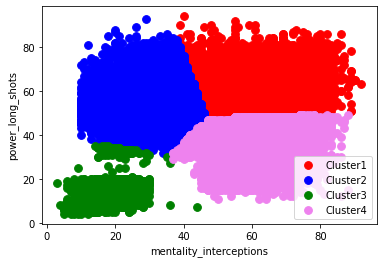

In [91]:
plt.scatter(df1[df1['cluster_number']==0]['mentality_interceptions'], df1[df1['cluster_number']==0]['power_long_shots'], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(df1[df1['cluster_number']==1]['mentality_interceptions'], df1[df1['cluster_number']==1]['power_long_shots'], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(df1[df1['cluster_number']==2]['mentality_interceptions'], df1[df1['cluster_number']==2]['power_long_shots'], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(df1[df1['cluster_number']==3]['mentality_interceptions'], df1[df1['cluster_number']==3]['power_long_shots'], s = 60, c = 'violet', label = 'Cluster4')
plt.xlabel('mentality_interceptions') 
plt.ylabel('power_long_shots') 
plt.legend() 

plt.show()

In [100]:
X= myKMeans(df, 6 , 2)
df2=df.copy()
df2['cluster_number']= X

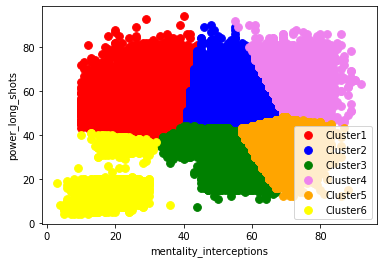

In [102]:
plt.scatter(df2[df2['cluster_number']==0]['mentality_interceptions'], df2[df2['cluster_number']==0]['power_long_shots'], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(df2[df2['cluster_number']==1]['mentality_interceptions'], df2[df2['cluster_number']==1]['power_long_shots'], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(df2[df2['cluster_number']==2]['mentality_interceptions'], df2[df2['cluster_number']==2]['power_long_shots'], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(df2[df2['cluster_number']==3]['mentality_interceptions'], df2[df2['cluster_number']==3]['power_long_shots'], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(df2[df2['cluster_number']==4]['mentality_interceptions'], df2[df2['cluster_number']==4]['power_long_shots'], s = 60, c = 'orange', label = 'Cluster5')
plt.scatter(df2[df2['cluster_number']==5]['mentality_interceptions'], df2[df2['cluster_number']==5]['power_long_shots'], s = 60, c = 'yellow', label = 'Cluster6')
plt.xlabel('mentality_interceptions') 
plt.ylabel('power_long_shots') 
plt.legend() 

plt.show()

0.3884936618534997
0.3867190028281789
0.3834082566735293
0.40550931518593797
0.40557693746161827
0.4031979246696695
0.3872427358980014
0.4018890640362554


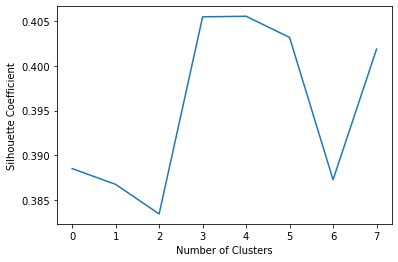

In [98]:
k=8
iterations=100
sil_coeff=[]
for i in range(k):
    kMean = myKMeans(df,k,iterations)
    score = silhouette_score(df, kMean, metric='euclidean')
    print(score)
    sil_coeff.append(score)

plt.plot(range(k), sil_coeff)
plt.xticks(range(k))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
#Here we have plotted the graph for different values of K i.e K=4 and K=6. The number of clusters equals to 4 seems appropriate as it well defines the data. 
#Moreover, as per the calculation of Silhouette Coefficient, the value of coefficient is highest for number of cluster equals to 4 which verifies our intuition.

## 2 Different initializations of k-Means

Take a look at the influence of different initializations of the k-Means algorithm. For this purpose, compare random initialization with the [*k-means++* initialization algorithm](https://en.wikipedia.org/wiki/K-means%2B%2B). Use the [sklearn implementation of k-Means](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) and run the algorithm with: 
- `1, 2, 3, 4, 5, 10, 20` as the maximum number of iterations (`max_iter`)
- `10` initializations each (`n_init`)
- and a convergence tolerance of `0` (`tol`).

For both initialization methods, plot the final value of the objective function (`inertia_`) against the number of iterations in line plots of different colors.

What do you observe?

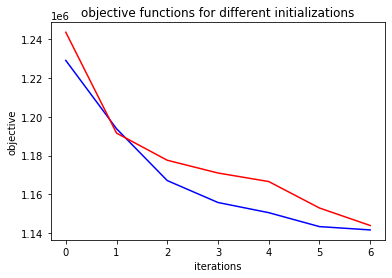

In [29]:
# Use the sklearn implementation of k-Means and plot the objective function for both initialization methods.
from sklearn.cluster import KMeans
iterations = [1, 2, 3, 4, 5, 10, 20]

objective = pd.Series(data=0, index=iterations)
objective_pp = pd.Series(data=0, index=iterations)
wcss=[]
for i in iterations:
    kmeans = KMeans(n_clusters=10, init = 'k-means++', tol=0, n_init=10, random_state = 42, max_iter=i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
objective= pd.Series(wcss)  

wcss1=[]
for i in iterations:
    kmeans = KMeans(n_clusters=10, init = 'random', tol=0, n_init=10, random_state = 42, max_iter=i)
    kmeans.fit(df)
    wcss1.append(kmeans.inertia_)
objective_pp= pd.Series(wcss1)  


plt.plot(objective.index, objective, 'b-')
plt.plot(objective_pp.index, objective_pp, 'r-')
plt.title('objective functions for different initializations')
plt.xlabel('iterations')
plt.ylabel('objective')
plt.show()

In [34]:
# Interpretation: Since the graph is between number of Iterations and Inertia. The iteration value where this decrease 
#in inertia value becomes constant can be chosen as the right iteration value for our data. From the graph, it can be observed 
# Kmeans++ require less number of iterations (like 4 to 5 iterations as stability in graph can be observed) than
#Random initialization (as graph tends to become constant at around 5-10 iterations). 